In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import svgutils.compose as sc
from IPython.display import SVG

In [2]:
df_tp = pd.read_csv('/glade/scratch/molina/DL_proj/model25_fig4_df_tp.csv')
df_fp = pd.read_csv('/glade/scratch/molina/DL_proj/model25_fig4_df_fp.csv')
df_fn = pd.read_csv('/glade/scratch/molina/DL_proj/model25_fig4_df_fn.csv')
df_tn = pd.read_csv('/glade/scratch/molina/DL_proj/model25_fig4_df_tn.csv')

<Figure size 936x576 with 0 Axes>

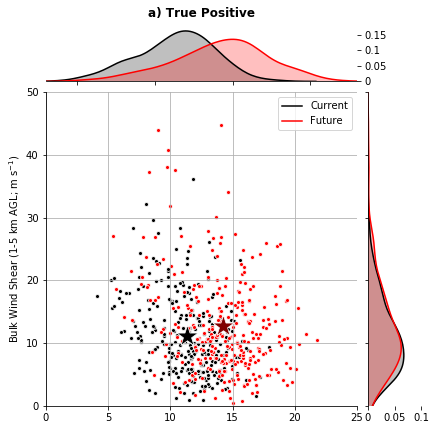

In [3]:
fig = plt.figure(figsize=(13,8))

g = sns.JointGrid(x = df_tp["QVAPOR_C"],y = df_tp["SHEAR_C"], data=df_tp, xlim=(3, 23), ylim=(0, 50))

sns.scatterplot(df_tp["QVAPOR_C"], df_tp["SHEAR_C"], color='k', s=15, ax=g.ax_joint)
sns.scatterplot(df_tp["QVAPOR_F"], df_tp["SHEAR_F"], color="r", s=15, ax=g.ax_joint)

df_scatt = pd.DataFrame({'A': df_tp["QVAPOR_C"].mean(), 
                         'B': df_tp["SHEAR_C"].mean(),
                         'C': df_tp["QVAPOR_F"].mean(), 
                         'D': df_tp["SHEAR_F"].mean(),}, index=[0])
sns.scatterplot(df_scatt["A"], df_scatt["B"], marker='*', color='k', s=500, ax=g.ax_joint, zorder=90)
sns.scatterplot(df_scatt["C"], df_scatt["D"], marker='*', color='maroon', s=500, ax=g.ax_joint, zorder=90)

sns.distplot(df_tp["QVAPOR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)
sns.distplot(df_tp["QVAPOR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)

sns.distplot(df_tp["SHEAR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)
sns.distplot(df_tp["SHEAR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)

g.ax_joint.set_ylabel('Bulk Wind Shear (1-5 km AGL; m s$^{-1}$)', fontsize=10)
g.ax_joint.set_xlabel(' ', fontsize=10)

g.ax_joint.set_yticks([0,10,20,30,40,50])
g.ax_joint.set_xticks([0,5,10,15,20,25])

g.ax_joint.grid('on')
g.ax_joint.set_title("a) True Positive", pad=75., fontweight='bold')

g.ax_marg_y.set_ylabel('')
g.ax_marg_x.set_xlabel('')

ax1 = g.ax_marg_x
ax1.set_ylim(0, 0.175)
ax1.yaxis.set_ticks([0,0.05,0.1,0.15])
ax1.yaxis.set_ticklabels([0,0.05,0.1,0.15], fontsize=10, visible=True)
ax1.yaxis.set_ticks_position('right')

ax2 = g.ax_marg_y
ax2.set_xlim(0, 0.1)
ax2.xaxis.set_ticks([0,0.05,0.1])
ax2.xaxis.set_ticklabels([0,0.05,0.1], fontsize=10, visible=True)
ax2.xaxis.set_ticks_position('bottom')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', lw=1.5),
                Line2D([0], [0], color='r', lw=1.5)]

g.ax_joint.legend(custom_lines, ['Current','Future'], fontsize=10)

plt.savefig(f"/glade/work/molina/DATA/temp_figs/journal_fig4_tp.svg", bbox_inches='tight', dpi=500, transparent=True)
plt.show()

<Figure size 936x576 with 0 Axes>

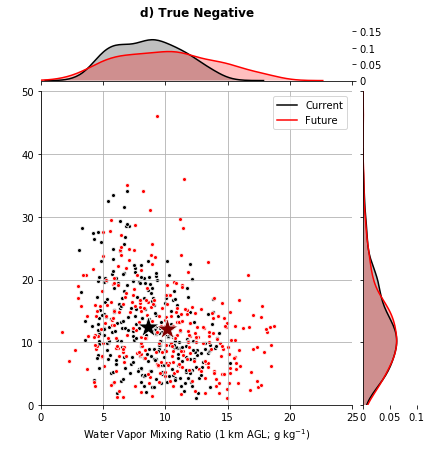

In [4]:
fig = plt.figure(figsize=(13,8))

g = sns.JointGrid(x = df_tn["QVAPOR_C"],y = df_tn["SHEAR_C"], data=df_tn, xlim=(0, 25), ylim=(0, 50))

sns.scatterplot(df_tn["QVAPOR_C"], df_tn["SHEAR_C"], color='k', s=15, ax=g.ax_joint)
sns.scatterplot(df_tn["QVAPOR_F"], df_tn["SHEAR_F"], color="r", s=15, ax=g.ax_joint)

sns.distplot(df_tn["QVAPOR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)
sns.distplot(df_tn["QVAPOR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)

sns.distplot(df_tn["SHEAR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)
sns.distplot(df_tn["SHEAR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)

df_scatt = pd.DataFrame({'A': df_tn["QVAPOR_C"].mean(), 
                         'B': df_tn["SHEAR_C"].mean(),
                         'C': df_tn["QVAPOR_F"].mean(), 
                         'D': df_tn["SHEAR_F"].mean(),}, index=[0])
sns.scatterplot(df_scatt["A"], df_scatt["B"], marker='*', color='k', s=500, ax=g.ax_joint, zorder=90)
sns.scatterplot(df_scatt["C"], df_scatt["D"], marker='*', color='maroon', s=500, ax=g.ax_joint, zorder=90)

g.ax_joint.set_ylabel(' ', fontsize=10)
g.ax_joint.set_xlabel(' ', fontsize=10)
g.ax_joint.grid('on')
g.ax_joint.set_title("d) True Negative", pad=75., fontweight='bold')
g.ax_joint.set_xlabel('Water Vapor Mixing Ratio (1 km AGL; g kg$^{-1}$)', fontsize=10)

g.ax_joint.set_yticks([0,10,20,30,40,50])
g.ax_joint.set_xticks([0,5,10,15,20,25])

g.ax_marg_y.set_ylabel('')
g.ax_marg_x.set_xlabel('')

ax1 = g.ax_marg_x
ax1.set_ylim(0, 0.165)
ax1.yaxis.set_ticks([0,0.05,0.1,0.15])
ax1.yaxis.set_ticklabels([0,0.05,0.1,0.15], fontsize=10, visible=True)
ax1.yaxis.set_ticks_position('right')

ax2 = g.ax_marg_y
ax2.set_xlim(0, 0.1)
ax2.xaxis.set_ticks([0,0.05,0.1])
ax2.xaxis.set_ticklabels([0,0.05,0.1], fontsize=10, visible=True)
ax2.xaxis.set_ticks_position('bottom')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', lw=1.5),
                Line2D([0], [0], color='r', lw=1.5)]

g.ax_joint.legend(custom_lines, ['Current','Future'], fontsize=10)

plt.savefig(f"/glade/work/molina/DATA/temp_figs/journal_fig4_tn.svg", bbox_inches='tight', dpi=500, transparent=True)
plt.show()

<Figure size 936x576 with 0 Axes>

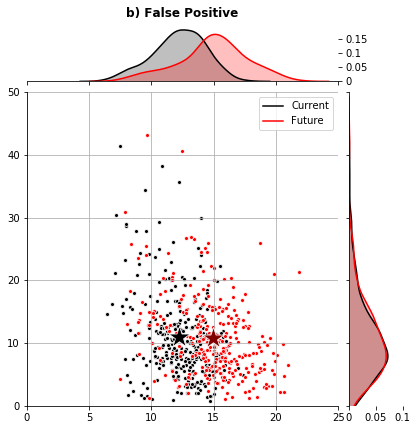

In [5]:
fig = plt.figure(figsize=(13,8))

g = sns.JointGrid(x = df_fp["QVAPOR_C"],y = df_fp["SHEAR_C"], data=df_fp, xlim=(0, 25), ylim=(0, 50))

sns.scatterplot(df_fp["QVAPOR_C"], df_fp["SHEAR_C"], color='k', s=15, ax=g.ax_joint)
sns.scatterplot(df_fp["QVAPOR_F"], df_fp["SHEAR_F"], color="r", s=15, ax=g.ax_joint)

sns.distplot(df_fp["QVAPOR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)
sns.distplot(df_fp["QVAPOR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)

sns.distplot(df_fp["SHEAR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)
sns.distplot(df_fp["SHEAR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)

df_scatt = pd.DataFrame({'A': df_fp["QVAPOR_C"].mean(), 
                         'B': df_fp["SHEAR_C"].mean(),
                         'C': df_fp["QVAPOR_F"].mean(), 
                         'D': df_fp["SHEAR_F"].mean(),}, index=[0])
sns.scatterplot(df_scatt["A"], df_scatt["B"], marker='*', color='k', s=500, ax=g.ax_joint, zorder=90)
sns.scatterplot(df_scatt["C"], df_scatt["D"], marker='*', color='maroon', s=500, ax=g.ax_joint, zorder=90)

g.ax_joint.set_ylabel('', fontsize=10)
g.ax_joint.set_xlabel('', fontsize=10)
g.ax_joint.grid('on')
g.ax_joint.set_title("b) False Positive", pad=75., fontweight='bold')

g.ax_joint.set_yticks([0,10,20,30,40,50])
g.ax_joint.set_xticks([0,5,10,15,20,25])

g.ax_marg_y.set_ylabel('')
g.ax_marg_x.set_xlabel('')

ax1 = g.ax_marg_x
ax1.set_ylim(0, 0.19)
ax1.yaxis.set_ticks([0,0.05,0.1,0.15])
ax1.yaxis.set_ticklabels([0,0.05,0.1,0.15], fontsize=10, visible=True)
ax1.yaxis.set_ticks_position('right')

ax2 = g.ax_marg_y
ax2.set_xlim(0, 0.1)
ax2.xaxis.set_ticks([0,0.05,0.1])
ax2.xaxis.set_ticklabels([0,0.05,0.1], fontsize=10, visible=True)
ax2.xaxis.set_ticks_position('bottom')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', lw=1.5),
                Line2D([0], [0], color='r', lw=1.5)]

g.ax_joint.legend(custom_lines, ['Current','Future'], fontsize=10)

plt.savefig(f"/glade/work/molina/DATA/temp_figs/journal_fig4_fp.svg", bbox_inches='tight', dpi=500, transparent=True)
plt.show()

<Figure size 936x576 with 0 Axes>

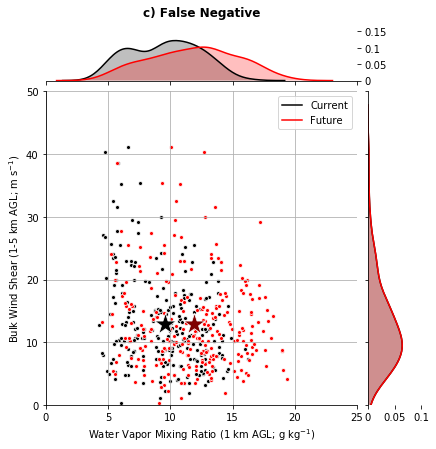

In [6]:
fig = plt.figure(figsize=(13,8))

g = sns.JointGrid(x = df_fn["QVAPOR_C"],y = df_fn["SHEAR_C"], data=df_fn, xlim=(0, 25), ylim=(0, 50))

sns.scatterplot(df_fn["QVAPOR_C"], df_fn["SHEAR_C"], color='k', s=15, ax=g.ax_joint)
sns.scatterplot(df_fn["QVAPOR_F"], df_fn["SHEAR_F"], color="r", s=15, ax=g.ax_joint)

sns.distplot(df_fn["QVAPOR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)
sns.distplot(df_fn["QVAPOR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_x)

sns.distplot(df_fn["SHEAR_C"], hist=False, kde=True, color="k", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)
sns.distplot(df_fn["SHEAR_F"], hist=False, kde=True, color="r", kde_kws={"shade": True, "linewidth":1.5}, ax=g.ax_marg_y, vertical=True)

df_scatt = pd.DataFrame({'A': df_fn["QVAPOR_C"].mean(), 
                         'B': df_fn["SHEAR_C"].mean(),
                         'C': df_fn["QVAPOR_F"].mean(), 
                         'D': df_fn["SHEAR_F"].mean(),}, index=[0])
sns.scatterplot(df_scatt["A"], df_scatt["B"], marker='*', color='k', s=500, ax=g.ax_joint, zorder=90)
sns.scatterplot(df_scatt["C"], df_scatt["D"], marker='*', color='maroon', s=500, ax=g.ax_joint, zorder=90)

g.ax_joint.set_ylabel(' ', fontsize=10)
g.ax_joint.set_xlabel('Water Vapor Mixing Ratio (1 km AGL; g kg$^{-1}$)', fontsize=10)
g.ax_joint.grid('on')
g.ax_joint.set_title("c) False Negative", pad=75., fontweight='bold')
g.ax_joint.set_ylabel('Bulk Wind Shear (1-5 km AGL; m s$^{-1}$)', fontsize=10)

g.ax_joint.set_yticks([0,10,20,30,40,50])
g.ax_joint.set_xticks([0,5,10,15,20,25])

g.ax_marg_y.set_ylabel('')
g.ax_marg_x.set_xlabel('')

ax1 = g.ax_marg_x
ax1.set_ylim(0, 0.165)
ax1.yaxis.set_ticks([0,0.05,0.1,0.15])
ax1.yaxis.set_ticklabels([0,0.05,0.1,0.15], fontsize=10, visible=True)
ax1.yaxis.set_ticks_position('right')

ax2 = g.ax_marg_y
ax2.set_xlim(0, 0.1)
ax2.xaxis.set_ticks([0,0.05,0.1])
ax2.xaxis.set_ticklabels([0,0.05,0.1], fontsize=10, visible=True)
ax2.xaxis.set_ticks_position('bottom')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', lw=1.5),
                Line2D([0], [0], color='r', lw=1.5)]

g.ax_joint.legend(custom_lines, ['Current','Future'], fontsize=10)

plt.savefig(f"/glade/work/molina/DATA/temp_figs/journal_fig4_fn.svg", bbox_inches='tight', dpi=500, transparent=True)
plt.show()

In [7]:
sc.Figure("8in", "9in", 
    sc.Panel(sc.SVG("/glade/work/molina/DATA/temp_figs/journal_fig4_tp.svg").scale(0.8).move(0,0)),
    sc.Panel(sc.SVG("/glade/work/molina/DATA/temp_figs/journal_fig4_fp.svg").scale(0.8).move(340,0)),
    sc.Panel(sc.SVG("/glade/work/molina/DATA/temp_figs/journal_fig4_fn.svg").scale(0.8).move(0,350)),
    sc.Panel(sc.SVG("/glade/work/molina/DATA/temp_figs/journal_fig4_tn.svg").scale(0.8).move(330,350)),
    ).save("/glade/work/molina/DATA/temp_figs/journal_fig4.svg")

SVG('/glade/work/molina/DATA/temp_figs/journal_fig4.svg')